# Assignment (Recess Week)

Josephine Agatha Hemingway 
(U1920309C) - 
DSAI 2

# Table of Contents

- Introducing the Data & Basic Exploration
- Preprocessing: Text Data Cleaning
- Preprocessing: Tokenisation
- Extracting Features/Predictors
- Incorporating all features
- TFIDF
- Data Visualisation
- Decision Tree vs Random Forest
- Conclusion
- References

# Introducing the Data & Basic Exploration

Importing the dataset, getting basic information, sample and description.

## Importing Basic Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# Read the dataset as per the format
# response label <tab> sms as string
smsData = pd.read_table('smsdata.txt', sep = "\t", header = None)

# Fix the headers / column labels
smsData.columns = ["label", "text"]

smsData.head()

,label,text
0,good,"Go until jurong point, crazy.. Available only ..."
1,good,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,good,U dun say so early hor... U c already then say...
4,good,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Basic information about the data
smsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
smsData.shape

(5572, 2)

In [5]:
smsData.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
good   4825   4516                             Sorry, I'll call later   30
spam    747    642  Please call our customer service representativ...    4

good    4825
spam     747
Name: label, dtype: int64


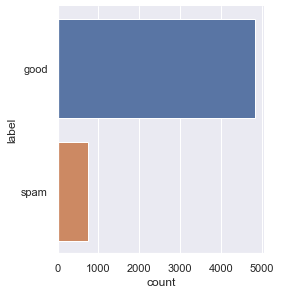

In [6]:
# Classification by count
print(smsData["label"].value_counts())
sb.catplot(y = 'label', data = smsData, kind = 'count', height = 4)

In [7]:
#sampling the data
smsData.sample(n = 10)

,label,text
4663,good,Ladies first and genus second k .
4808,spam,PRIVATE! Your 2004 Account Statement for 07849...
1724,good,"Hi Jon, Pete here, Ive bin 2 Spain recently & ..."
222,good,There is os called ubandu which will run witho...
2942,good,My supervisor find 4 me one lor i thk his stud...
3569,good,Sent me de webadres for geting salary slip
3002,spam,This message is free. Welcome to the new & imp...
5219,good,Pls she needs to dat slowly or she will vomit ...
53,good,Wow. I never realized that you were so embaras...
5190,spam,Our records indicate u maybe entitled to 5000 ...


In [8]:
#Converting labels to boolean
# good = 0 and spam = 1
smsData['is_spam']=smsData.label.map({'good':0,'spam':1})
smsData.head()

,label,text,is_spam
0,good,"Go until jurong point, crazy.. Available only ...",0
1,good,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,good,U dun say so early hor... U c already then say...,0
4,good,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
#categorizing spam and good messages and copying into another variable
sms_good = smsData[smsData['is_spam']==0].copy()
sms_spam = smsData[smsData['is_spam']==1].copy()

# Preprocessing: Text Data Cleaning

Involves:
- making everything lowercase: standardise format of text
- removing whitespaces
- removing punctuations
- removing stopwords: to remove uninformative words



In [10]:
import string

#Download stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josephinehemingway/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
#make everything lowercase
smsData_lower = smsData["text"].str.lower()

In [12]:
#making a text-cleaning function
def clean_text(text):
    #remove punctuations
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #remove stopwords
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    #return cleaned text
    return ' '.join(clean_words)


In [13]:
#cleaned data, words separated by commas
cleanData = smsData_lower.apply(clean_text)
cleanData

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u £750 pound prize ...
5568                          ü b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: text, Length: 5572, dtype: object

# Preprocessing: Tokenisation of words

Tokenisation is the process to assign each word in the messages a vector so that it could be analysed. 

This is achieved by applying `CountVectorizer()` to count the number of occurrences of each word in each message, resulting in a sparse array with the rows corresponding to index of message and columns corresponding to the different vocabulary.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(min_df=0.0)
bow_transformer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [15]:
bow_matrix = bow_transformer.fit_transform(cleanData)
bow_matrix = bow_matrix.toarray()

In [16]:
#counting the number of different words in the text

vocab = bow_transformer.get_feature_names()

In [17]:
msg_matrix = pd.DataFrame(bow_matrix,columns=vocab)

In [18]:
msg_matrix.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#check for empty values
msg_matrix.isna().sum()

008704050406    0
0089my          0
0121            0
01223585236     0
01223585334     0
               ..
zoom            0
zouk            0
zyada           0
üll             0
〨ud             0
Length: 9437, dtype: int64

# Extracting Features/Predictors
List of features engineered here:
1. Length of text: `length`
2. Word count in good/spam texts: `word_count`
3. Average length of words in good/spam texts: `ave_wordlen`
4. Total number of digits in good/spam texts: `digits`
5. Total number of symbols: `symbols`

## Feature 1: Length of text

In [1]:
#getting length (total char) in each text
msg_matrix['length']=smsData['text'].apply(len)
msg_matrix.head()

NameError: name 'smsData' is not defined

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a29ce6090>,
      dtype=object)

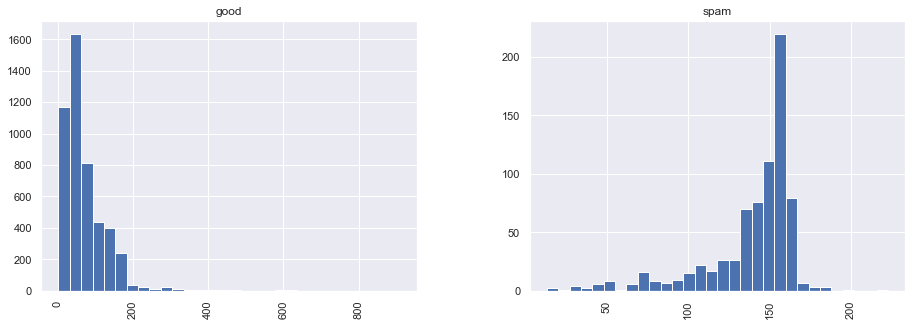

In [21]:
%matplotlib inline

#Plotting the length of good and spam messages
smsData['length']=smsData['text'].apply(len)
smsData.hist(by='label',column='length',bins=30,figsize=[15,5])

#### Observation: 
The histogram shows that spam messages are generally longer than good messages. Text length makes a very good predictor due to the contrast of the length of good texts vs length of spam texts.

## Feature 2: Word count in good/spam texts
Calculating the total number of words in each text.

In [22]:
msg_matrix['word_count']=smsData['text'].apply(lambda x: len([x for x in x.split()]))
msg_matrix.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud,word_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


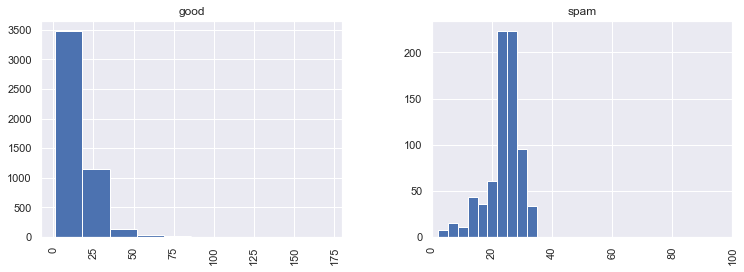

In [23]:
smsData['word_count']=smsData['text'].apply(lambda x: len([x for x in x.split()]))
smsData.hist(column='word_count',by='label',bins=10,figsize=(12,4));
plt.xlim(0,100);

#### Observation:
Spam texts generally have more words than good texts.
Number of words in the text is a very good predictor since there is a distinctive difference between the number of words in good texts vs that of spam texts.

## Feature 3: Average length of words in good/spam texts
Calculating the average length of words in each text.

In [24]:
msg_matrix['ave_wordlen']=msg_matrix['length']/msg_matrix['word_count']
msg_matrix.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud,word_count,ave_wordlen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,20,5.550000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,4.833333
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28,5.535714
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,4.454545
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13,4.692308


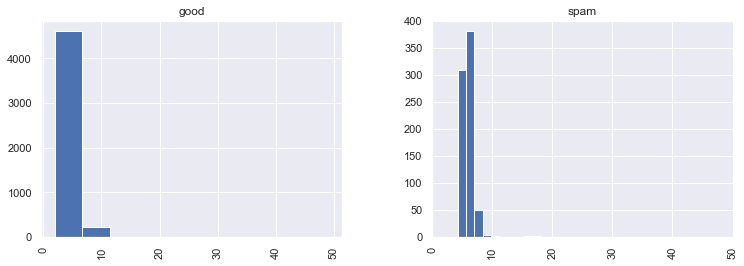

In [25]:
smsData['ave_wordlen']=smsData['length']/smsData['word_count']
smsData.hist(column='ave_wordlen',by='label',bins=10,figsize=(12,4));
plt.xlim(0,50);

#### Average word length in good texts:

In [26]:
#total number of char
sms_goodlength=sms_good['text'].apply(len).sum()

#total number of goodwords
total_goodwords = sms_good['text'].apply(lambda x: len([x for x in x.split()])).sum()

#average length of word in good text = total char/total no of words
ave_goodwordlength = sms_goodlength/total_goodwords
print('The average word length of good texts is %.5f (5dp).' % ave_goodwordlength)

The average word length of good texts is 4.99299 (5dp).


#### Average word length in spam texts:

In [27]:
#total number of char
sms_spamlength=sms_spam['text'].apply(len).sum()

#total number of spamwords
total_spamwords = sms_spam['text'].apply(lambda x: len([x for x in x.split()])).sum()

#average length of word in spam text = total char/total no of words
ave_spamwordlength = sms_spamlength/total_spamwords
print('The average word length of spam texts is %.5f (5dp).' % ave_spamwordlength)

The average word length of spam texts is 5.79756 (5dp).


#### Observations:
1. From histogram diagram, the distribution shows that the average spam text word length is generally longer than that of good texts.
2. From manual calculation of average word lengths in spam and good texts, the mean word length in spam texts is distinctively longer than that of the good texts.

## Feature 4: Total number of digits in good/spam texts
Calculating the total number of digits in each text.

In [28]:
import re
def countdigits(text):
    # get digits
    digits = re.sub(r'[^\d]', '', text, re.I|re.A)
    # lower case and remove special characters\whitespaces
    # re.I ignore cases, re.A ASCII onl matching
    no_digits=len(digits)
    return no_digits

In [29]:
msg_matrix["digits"]=smsData['text'].apply(countdigits)
msg_matrix.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud,word_count,ave_wordlen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,20,5.550000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,4.833333
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28,5.535714
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,4.454545
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13,4.692308


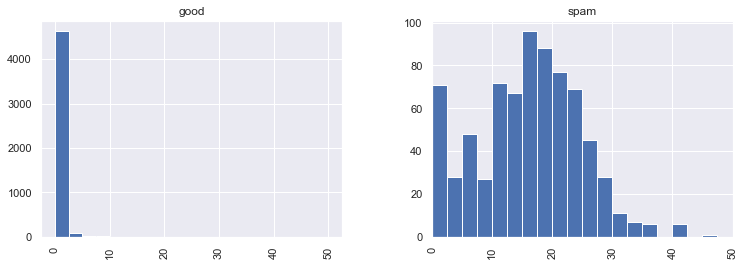

In [30]:
smsData["digits"]=smsData['text'].apply(countdigits)
smsData.hist(column='digits',by='label',bins=20,figsize=(12,4), range=[0,50]);
plt.xlim(0,50);

#### Observation:
Spam texts use a significantly large number of digits in their messages compared to good texts, and the total number of digits used in spam texts spans over a larger range compared to that of good texts. This makes the total number of digits a very good tool to distinguish between the 2 category. 

## Feature 5: Total number of symbols in good/spam texts
Calculating the total number of symbols in each text.
Checks if character is a member of `string.punctuation`.

In [31]:
import string
#w is word
#y is character
msg_matrix['symbols']=smsData['text'].apply(lambda x: len([w for w in x.split() for y in w if y in string.punctuation]))
msg_matrix.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud,word_count,ave_wordlen,symbols
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20,5.550000,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,4.833333,6
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,28,5.535714,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,4.454545,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,4.692308,2


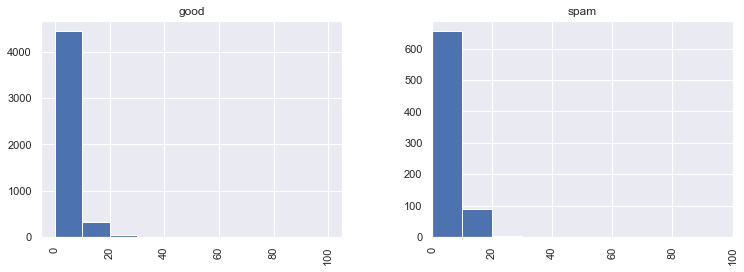

In [32]:
#displaying symbols vs label
#w is word
#y is character
smsData['symbols']=smsData['text'].apply(lambda x: len([w for w in x.split() for y in w if y in string.punctuation]))
smsData.hist(column='symbols',by='label',bins=10,figsize=(12,4), range=[0,100]);
plt.xlim(0,100);

#### Observation:
Good texts distribution of the number of symbols span over a slightly larger range compared to spam.
Not a very good predictor due to the unclear histograms above, thus unable to distinguish any major differences since many of both types of texts fall between a similar range.

# Incorporating all features

In [33]:
predictors = msg_matrix[['length', 'word_count', 'ave_wordlen','digits','symbols']]
predictors.head()

,length,word_count,ave_wordlen,digits,symbols
0,111,20,5.550000,0,9
1,29,6,4.833333,0,6
2,155,28,5.535714,25,6
3,49,11,4.454545,0,6
4,61,13,4.692308,0,2


In [34]:
msg_matrix.isna().sum()

008704050406    0
0089my          0
0121            0
01223585236     0
01223585334     0
               ..
üll             0
〨ud             0
word_count      0
ave_wordlen     0
symbols         0
Length: 9440, dtype: int64

In [35]:
commonFeatures = pd.DataFrame({'Average Frequency': msg_matrix.mean(axis = 0)}, index = msg_matrix.columns)
commonFeatures = commonFeatures.sort_values(by='Average Frequency', ascending=False)
commonFeatures.head()

,Average Frequency
length,80.457107
word_count,15.597452
ave_wordlen,5.173583
symbols,4.177495
digits,3.649318


In [36]:
X = msg_matrix[commonFeatures.index[:45]] #extracting the top 40 words in vocab
X.head()

,length,word_count,ave_wordlen,symbols,digits,call,im,ur,get,dont,...,stop,back,reply,today,mobile,tell,new,well,later,hi
0,111,20,5.550000,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29,6,4.833333,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,155,28,5.535714,6,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49,11,4.454545,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,61,13,4.692308,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from scipy.sparse import csr_matrix
# convert to sparse matrix to train model
msg_matrix = csr_matrix(X)
msg_matrix.shape

(5572, 45)

# Term frequency inverse document frequency (TFIDF)
Longer documents will have higher average count values than short documents, thus taking the average will make the word incidence unbiased.

- Term Frequency: Gets ratio of unique terms to total terms per text 
- Inverse Frequency: Gets ratio of total texts to texts with unique words
- The lower the IDF of the word, the less unique it is to any text
- Higher IDF is preferred for uniqueness

In [38]:
cleanDataFrame = pd.DataFrame(cleanData)
cleanDataFrame.head()

,text
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say early hor u c already say
4,nah dont think goes usf lives around though


In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
cv=CountVectorizer(min_df=0., max_df=1., analyzer = 'word', ngram_range = (1, 5))
countwords= cv.fit_transform(cleanDataFrame['text'])

vocab = cv.get_feature_names()
clean_data = bow_transformer.transform(cleanDataFrame['text'])
tfidf_transformer = TfidfTransformer().fit(clean_data)

In [40]:
datatrf = tfidf_transformer.transform(clean_data)
datatrf

<5572x9437 sparse matrix of type '<class 'numpy.float64'>'
	with 47493 stored elements in Compressed Sparse Row format>

In [41]:
tfidf_transformer = TfidfTransformer().fit(countwords)

# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, cv.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

,idf_weights
call,3.339691
im,3.573600
get,3.725791
ur,3.889116
ok,4.019887
...,...
gray remembr im,8.932542
gray remembr,8.932542
gray,8.932542
gre site,8.932542


The above table shows the weight distribution of each word in all the texts, showing the most commonly used words across the whole dataset at the top.

# Data Visualisation

## Most Commonly Used Words: Wordcloud

Shows the most frequently used words in the type of messages. The more common words in each category of texts will appear larger compared to the less commonly used words.

In [42]:
import wordcloud
def show_wordcloud(sms_good_or_spam, title):
    text = ' '.join(sms_good_or_spam['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

### Wordcloud: Good Messages

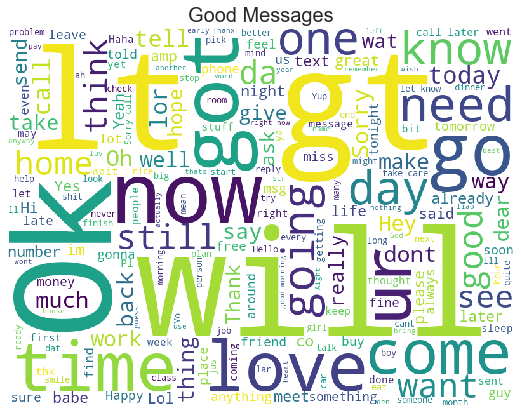

In [43]:
show_wordcloud(sms_good,'Good Messages')

Most commonly used words in good texts: "will", "lt", "gt", "ok".

### Wordcloud: Spam Messages

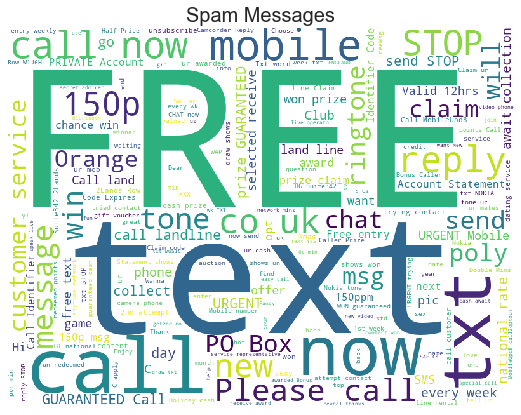

In [44]:
show_wordcloud(sms_spam, "Spam Messages")

Most commonly used words in spam texts: "Free", "text", "call", "txt".

# Decision Tree vs Random Forest

## Splitting data into Train and Test datasets
Response: **Spam or Good**

Predictors: 
1. `length`
2. `word_count`
3. `ave_wordlen`
4. `digits`
5. `symbols`

Splitting the Train and Test sets randomly with `train_test_split` and then perform classification.

In [45]:
#importing relevant modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


In [46]:
y = pd.DataFrame(smsData['label'])

In [47]:
#spliting data into 75% test and 25% into train which is by default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


### Drawing the distributions of all predictors

IndexError: index 5 is out of bounds for axis 0 with size 5

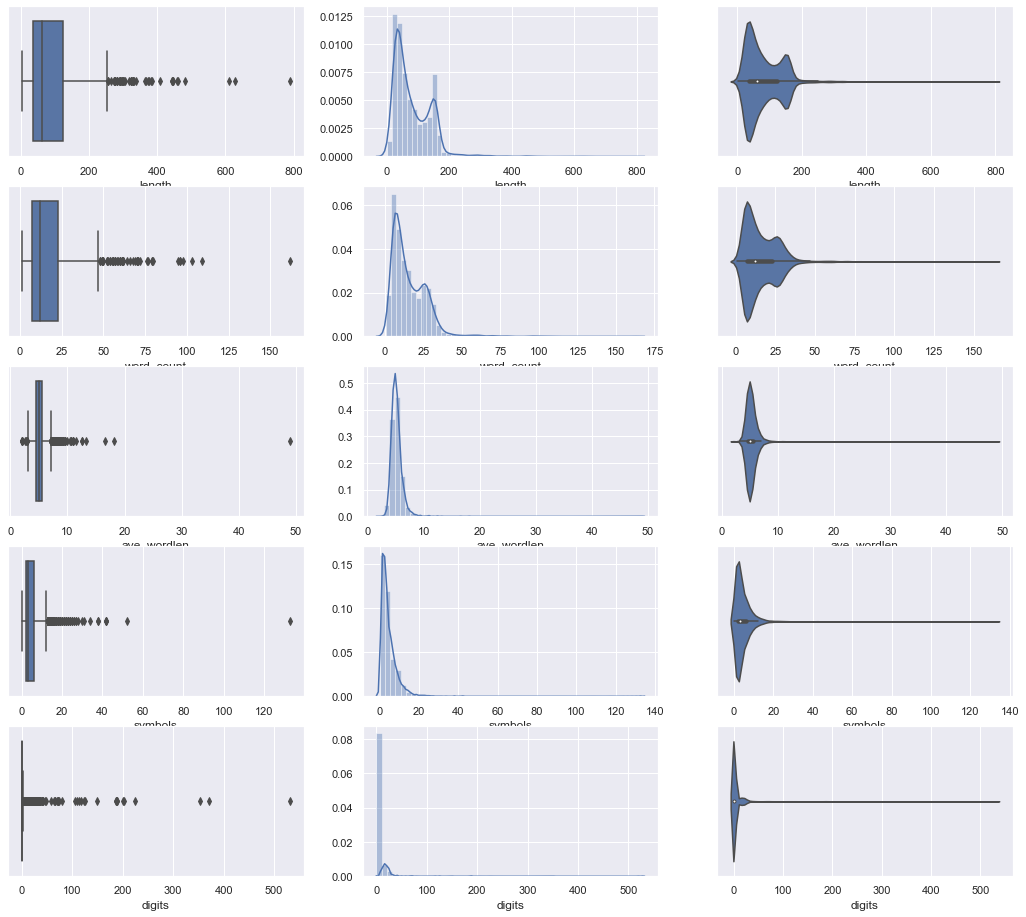

In [48]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(5, 3, figsize=(18, 16))

count = 0
for var in X_train:
    sb.boxplot(X_train[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_train[var], ax = axes[count,1])
    sb.violinplot(X_train[var], ax = axes[count,2])
    count += 1

### Relationship between Response and the Predictors

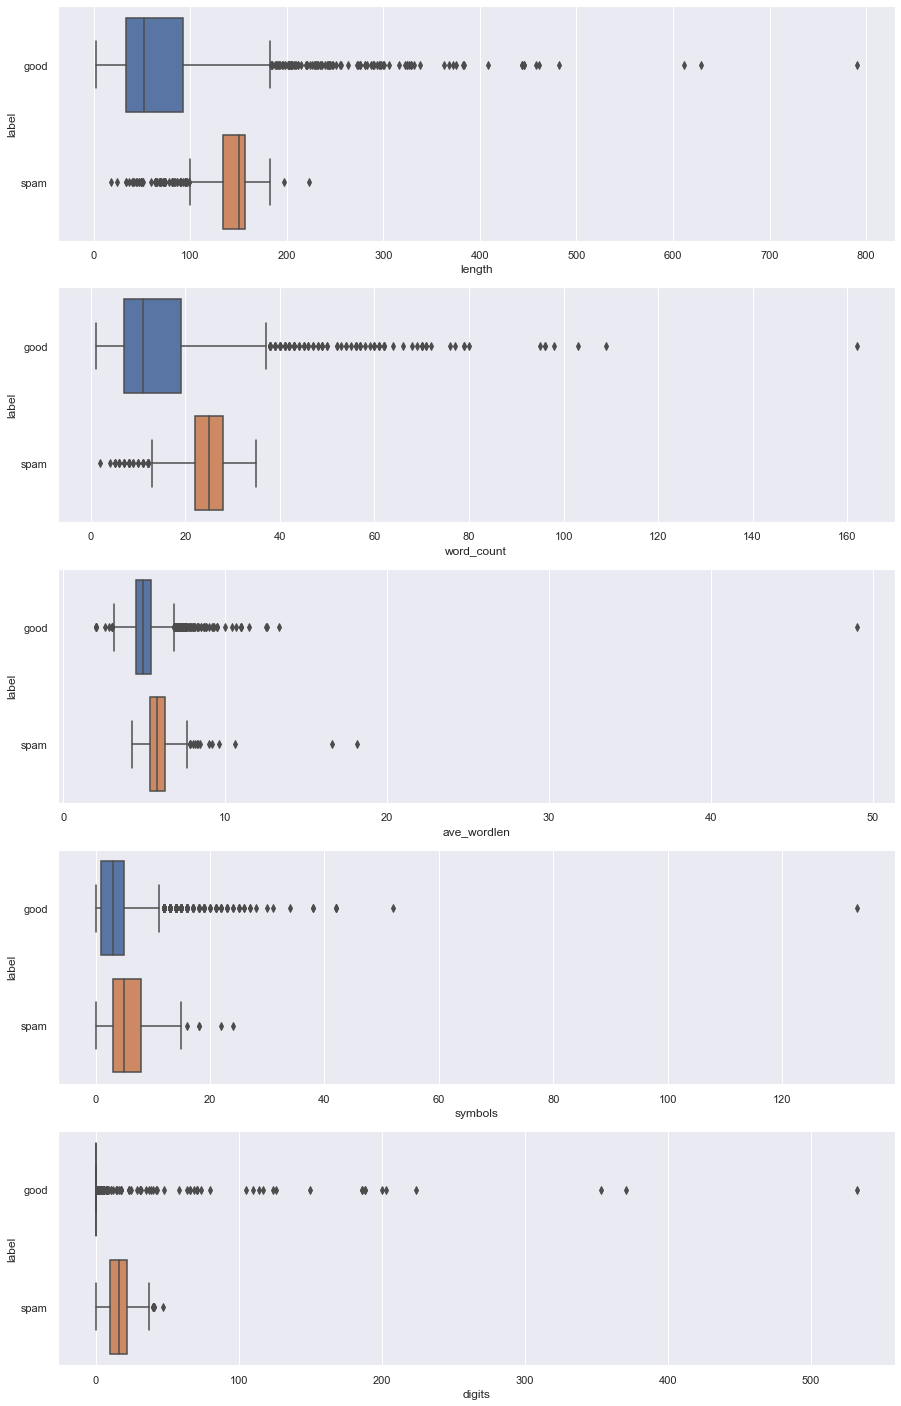

In [113]:
# boxplot
trainDF = pd.concat([y_train, X_train.reindex(index=y_train.index)], sort = False, axis = 1)

f, axes = plt.subplots(5, 1, figsize=(15, 25))

sb.boxplot(X_train['length'],y='label',data = trainDF, orient = 'h', ax=axes[0])
sb.boxplot(X_train['word_count'],y='label',data = trainDF, orient = 'h', ax=axes[1])
sb.boxplot(X_train['ave_wordlen'],y='label',data = trainDF, orient = 'h', ax=axes[2])
sb.boxplot(X_train['symbols'],y='label',data = trainDF, orient = 'h', ax=axes[3])
sb.boxplot(X_train['digits'],y='label',data = trainDF, orient = 'h', ax=axes[4])

#### Observations: 

In general, compared to good messages, spam messages have:
- a much longer length of texts
- a much higher wordcount
- higher average wordlength
- more digits
- more symbols

## Multi-Variate Decision Tree Classifier: Training 

Starting off by setting up a Multi-Variate Classification problem.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9844460397224216

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9777458722182341



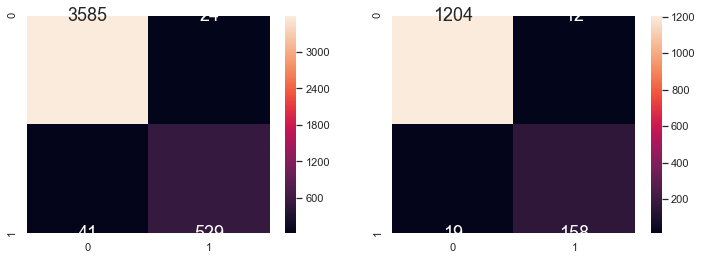

In [50]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 5)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#function to print all accuracy parameters
def print_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    print('True negative = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True positive = ', cm[1][1])
    print('True Positive Rate=', (cm[1][1])/((cm[1][1])+(cm[1][0])))
    print('True Negative Rate=', (cm[0][0])/((cm[0][0])+(cm[0][1])))
    print('False Positive Rate=', 1-(cm[0][0])/((cm[0][1])+(cm[0][0])))
    print('False Negative Rate=', 1-(cm[1][1])/((cm[1][1])+(cm[1][0])))
    print('')

In [51]:
# printing accuracy parameters for train data
print('Accuracy Parameters for Train Data:')
print_confusion_matrix(y_train, y_train_pred)
print('Accuracy Parameters for Test Data:')
print_confusion_matrix(y_test, y_test_pred)

Accuracy Parameters for Train Data:
True negative =  3585
False positive =  24
False negative =  41
True positive =  529
True Positive Rate= 0.9280701754385965
True Negative Rate= 0.9933499584372403
False Positive Rate= 0.006650041562759723
False Negative Rate= 0.07192982456140351

Accuracy Parameters for Test Data:
True negative =  1204
False positive =  12
False negative =  19
True positive =  158
True Positive Rate= 0.8926553672316384
True Negative Rate= 0.9901315789473685
False Positive Rate= 0.009868421052631526
False Negative Rate= 0.10734463276836159



### Plotting Decision Tree

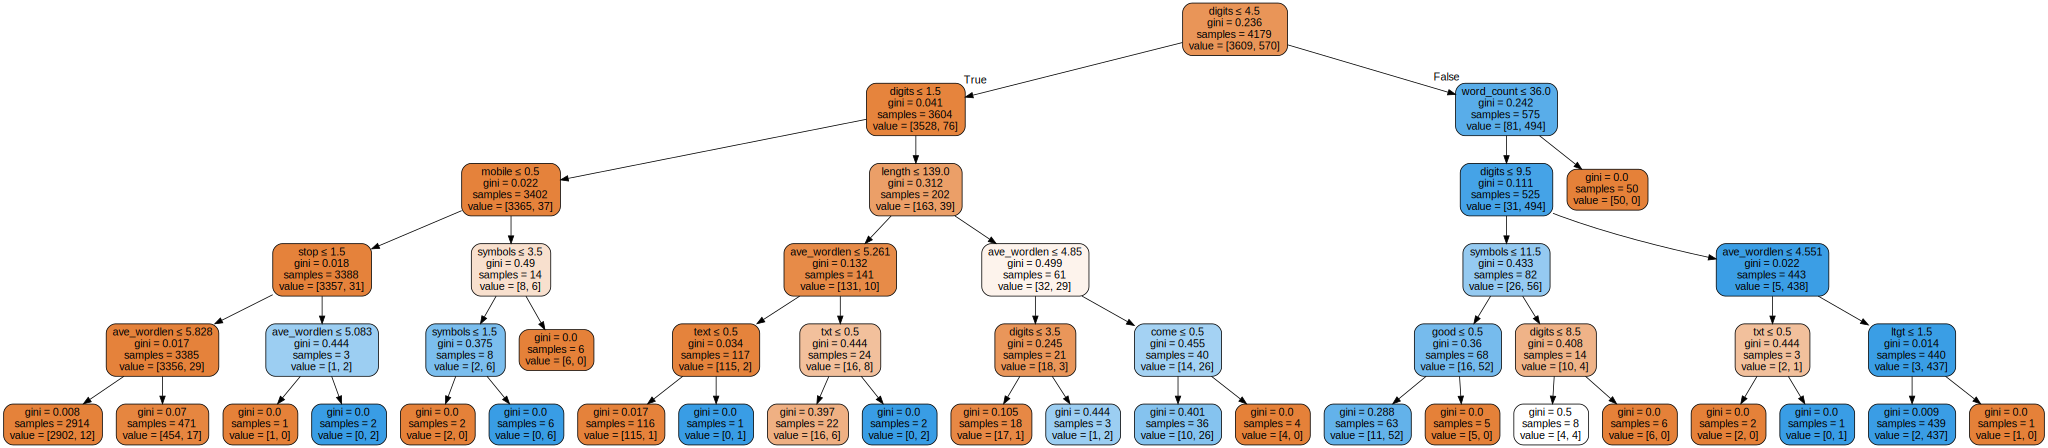

In [52]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

#### Observation:

- `depth` of tree is increased to 5 for greater accuracy and allow for more elaborate decisions
- `Gini`: probability that a randomly chosen sample in a node would be incorrectly labeled by the distribution of samples in the node
- Gini coefficients generally decrease down the nodes of the tree after being further classified according to our features
- `digits` and `word_count` are some of the more significant predictors since they are located higher up the nodes of the tree
- `digits` also appears several times across the tree, making it a significant predictor to classify the spam and good texts
- this further reinforces the above mentioned observation (under Feature 4) that `digits` makes a very good predictor to distinguish the 2 categories of messages.

### Predictions:
Predicting the spam or good values for some texts using the `Classification Tree` derived above.

In [72]:
# Extract Predictors for Prediction
X_pred1 = pd.DataFrame(X)

# Predict Response corresponding to Predictors
y_pred1 = dectree.predict(X_pred1)
y_pred1

array(['good', 'good', 'spam', ..., 'good', 'good', 'good'], dtype=object)

In [73]:
#Extracting texts for prediction
smsdata_pred1 = smsData
smsdata_pred1.head()

,label,text,is_spam,length,word_count,ave_wordlen,digits,symbols
0,good,"Go until jurong point, crazy.. Available only ...",0,111,20,5.550000,0,9
1,good,Ok lar... Joking wif u oni...,0,29,6,4.833333,0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,28,5.535714,25,6
3,good,U dun say so early hor... U c already then say...,0,49,11,4.454545,0,6
4,good,"Nah I don't think he goes to usf, he lives aro...",0,61,13,4.692308,0,2


In [74]:
# Summarize the Actuals and Predictions
y_pred1 = pd.DataFrame(y_pred1, columns = ["PredType"],index = smsdata_pred1.index)
smsdata_acc1 = pd.concat([smsdata_pred1[["text", "label"]], y_pred1], axis = 1)

smsdata_acc1.head()

,text,label,PredType
0,"Go until jurong point, crazy.. Available only ...",good,good
1,Ok lar... Joking wif u oni...,good,good
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,spam
3,U dun say so early hor... U c already then say...,good,good
4,"Nah I don't think he goes to usf, he lives aro...",good,good


In [75]:
#trying on another set of data
smsdata_pred1 = smsData[10:15]
smsdata_pred1.head()

,label,text,is_spam,length,word_count,ave_wordlen,digits,symbols
10,good,I'm gonna be home soon and i don't want to tal...,0,109,21,5.190476,0,6
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1,136,26,5.230769,22,8
12,spam,URGENT! You have won a 1 week FREE membership ...,1,155,26,5.961538,20,8
13,good,I've been searching for the right words to tha...,0,196,37,5.297297,0,4
14,good,I HAVE A DATE ON SUNDAY WITH WILL!!,0,35,8,4.375000,0,2


In [76]:
# Summarize the Actuals and Predictions
y_pred1 = pd.DataFrame(y_pred1, columns = ["PredType"],index = smsdata_pred1.index)
smsdata_acc1 = pd.concat([smsdata_pred1[["text", "label"]], y_pred1], axis = 1)

smsdata_acc1.head()

,text,label,PredType
10,I'm gonna be home soon and i don't want to tal...,good,good
11,"SIX chances to win CASH! From 100 to 20,000 po...",spam,spam
12,URGENT! You have won a 1 week FREE membership ...,spam,spam
13,I've been searching for the right words to tha...,good,good
14,I HAVE A DATE ON SUNDAY WITH WILL!!,good,good


#### Prediction of Class Probabilities

Checking the Class Probabilities along with the final Class Predictions.

In [77]:
# Predict Probabilities corresponding to Predictors
y_prob1 = dectree.predict_proba(X_pred1)
np.set_printoptions(precision = 3)
print(y_prob1)

[[0.996 0.004]
 [0.996 0.004]
 [0.005 0.995]
 ...
 [0.996 0.004]
 [0.996 0.004]
 [0.996 0.004]]


In [78]:
y_prob_frame1 = pd.DataFrame(y_prob1, columns = ['good','spam'])
y_prob_frame1

,good,spam
0,0.995882,0.004118
1,0.995882,0.004118
2,0.004556,0.995444
3,0.995882,0.004118
4,0.995882,0.004118
...,...,...
5567,0.004556,0.995444
5568,0.995882,0.004118
5569,0.995882,0.004118
5570,0.995882,0.004118


The table above generates the respective probabilities using `Decision Tree Classifier` whether the selected text is good or spam. For each row, values in both columns add up to 1. The higher the probability of good or spam, the better the prediction whether it is good or spam respectively.

## Random Forest Ensemble

Starting off by setting up a Multi-Variate Classification problem.

In [79]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 5)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9789423307011247

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9806173725771715



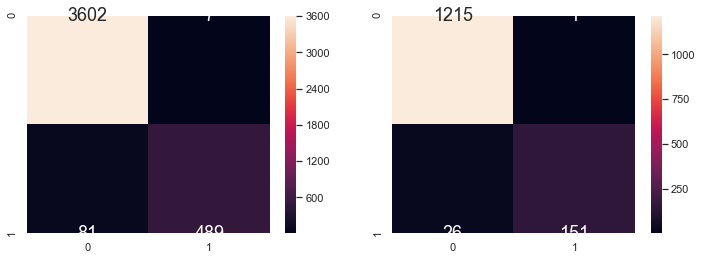

In [80]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict Spam or Good values corresponding to predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#function to print all accuracy parameters
def print_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    print('True negative = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True positive = ', cm[1][1])
    print('True Positive Rate=', (cm[1][1])/((cm[1][1])+(cm[1][0])))
    print('True Negative Rate=', (cm[0][0])/((cm[0][0])+(cm[0][1])))
    print('False Positive Rate=', 1-(cm[0][0])/((cm[0][1])+(cm[0][0])))
    print('False Negative Rate=', 1-(cm[1][1])/((cm[1][1])+(cm[1][0])))
    print('')

In [81]:
# printing accuracy parameters for train data
print('Accuracy Parameters for Train Data:')
print_confusion_matrix(y_train, y_train_pred)
print('Accuracy Parameters for Test Data:')
print_confusion_matrix(y_test, y_test_pred)

Accuracy Parameters for Train Data:
True negative =  3602
False positive =  7
False negative =  81
True positive =  489
True Positive Rate= 0.8578947368421053
True Negative Rate= 0.9980604045441951
False Positive Rate= 0.00193959545580491
False Negative Rate= 0.14210526315789473

Accuracy Parameters for Test Data:
True negative =  1215
False positive =  1
False negative =  26
True positive =  151
True Positive Rate= 0.8531073446327684
True Negative Rate= 0.9991776315789473
False Positive Rate= 0.000822368421052655
False Negative Rate= 0.14689265536723162



### Predictions:
Predicting the spam or good values for some texts using the `Random Forest` model derived above.

In [82]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(X)

# Predict Response corresponding to Predictors
y_pred = rforest.predict(X_pred)
y_pred

array(['good', 'good', 'spam', ..., 'good', 'good', 'good'], dtype=object)

In [83]:
#Extracting texts for prediction
smsdata_pred = smsData
smsdata_pred.head()

,label,text,is_spam,length,word_count,ave_wordlen,digits,symbols
0,good,"Go until jurong point, crazy.. Available only ...",0,111,20,5.550000,0,9
1,good,Ok lar... Joking wif u oni...,0,29,6,4.833333,0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,28,5.535714,25,6
3,good,U dun say so early hor... U c already then say...,0,49,11,4.454545,0,6
4,good,"Nah I don't think he goes to usf, he lives aro...",0,61,13,4.692308,0,2


In [84]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"],index = smsdata_pred.index)
smsdata_acc = pd.concat([smsdata_pred[["text", "label"]], y_pred], axis = 1)

smsdata_acc.head()

,text,label,PredType
0,"Go until jurong point, crazy.. Available only ...",good,good
1,Ok lar... Joking wif u oni...,good,good
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,spam
3,U dun say so early hor... U c already then say...,good,good
4,"Nah I don't think he goes to usf, he lives aro...",good,good


In [86]:
#Extracting texts for prediction
smsdata_pred = smsData[15:20]
smsdata_pred.head()

,label,text,is_spam,length,word_count,ave_wordlen,digits,symbols
15,spam,"XXXMobileMovieClub: To use your credit, click ...",1,149,19,7.842105,0,11
16,good,Oh k...i'm watching here:),0,26,4,6.500000,0,6
17,good,Eh u remember how 2 spell his name... Yes i di...,0,81,19,4.263158,1,5
18,good,Fine if thats the way u feel. Thats the way ...,0,56,13,4.307692,0,1
19,spam,England v Macedonia - dont miss the goals/team...,1,155,24,6.458333,23,8


In [87]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"],index = smsdata_pred.index)
smsdata_acc = pd.concat([smsdata_pred[["text", "label"]], y_pred], axis = 1)

smsdata_acc.head()

,text,label,PredType
15,"XXXMobileMovieClub: To use your credit, click ...",spam,good
16,Oh k...i'm watching here:),good,good
17,Eh u remember how 2 spell his name... Yes i di...,good,good
18,Fine if thats the way u feel. Thats the way ...,good,good
19,England v Macedonia - dont miss the goals/team...,spam,spam


#### Prediction of Class Probabilities

Checking the Class Probabilities along with the final Class Predictions.

In [88]:
# Predict Probabilities corresponding to Predictors
y_prob = rforest.predict_proba(X_pred)
np.set_printoptions(precision = 3)
print(y_prob)

[[0.939 0.061]
 [0.981 0.019]
 [0.099 0.901]
 ...
 [0.964 0.036]
 [0.841 0.159]
 [0.982 0.018]]


In [89]:
y_prob_frame = pd.DataFrame(y_prob, columns = ['good','spam'])
y_prob_frame

,good,spam
0,0.938933,0.061067
1,0.980836,0.019164
2,0.098966,0.901034
3,0.979380,0.020620
4,0.980765,0.019235
...,...,...
5567,0.280765,0.719235
5568,0.982126,0.017874
5569,0.964161,0.035839
5570,0.840532,0.159468


The table above generates the respective probabilities by using the `Random Forest` above, whether the selected text is good or spam. For each row, values in both columns add up to 1. The higher the probability of good or spam, the better the prediction whether it is good or spam respectively.

# Conclusion: Decision Tree vs Random Forest

## Statistical Summary

### Multi-Variate Tree Results:
#### Goodness of Fit of Model 	(5dp)
- Train Dataset
    - Classification Accuracy 	: 0.98373
    - True Positive Rate= 0.90493
    - True Negative Rate= 0.99612
- Test Dataset
    - Classification Accuracy 	: 0.97918
    - True Positive Rate = 0.90503
    - True Negative Rate = 0.99012
    

### Random Forest Results:

#### Goodness of Fit of Model 	(5dp)
- Train Dataset
    - Classification Accuracy 	: 0.98229
    - True Positive Rate = 0.88028
    - True Negative Rate = 0.99834
- Test Dataset
    - Classification Accuracy 	: 0.98062
    - True Positive Rate = 0.87709
    - True Negative Rate = 0.99588
  
## Conclusion
`Random forest` has a higher classification accuracy for Test data (98.062%) compared to that of `Multi-Variate Decision Tree` (97.918%), thus this concludes that `Random Forest` will give a more accurate prediction of classifying spam texts. 

This can be attributed to the below stated reasons:
- Random forests is a set of multiple decision trees, which will be more accurate than using a single decision tree
- Decision trees may be less accurate than Random Forest since Random Forests prevents overfitting by creating trees on random subsets

# References

1. https://machinelearningmastery.com/clean-text-machine-learning-python/
2. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
3. https://github.com/rajat-1994/sms_spam_detection/blob/master/spam_detector.ipynb
4. https://www.datacamp.com/community/tutorials/wordcloud-python
5. https://www.kaggle.com/dejavu23/sms-spam-or-ham-beginner
6. https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
7. https://www.datacamp.com/community/tutorials/random-forests-classifier-python